# Mall Customers


## Exploratory Data Analysis


 Importing the libraries
Exploring the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('data/Mall_Customers.csv')
# selecting annual income and spending score "most important for clustering "
x = data.iloc[:, [3,4]].values


In [ ]:
data.shape

(200, 5)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

### Clearing the data

In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(200, 5)

##### Droping the CustomerID column because it is not important and has high cardinality`

In [ ]:
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
data.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


###### converting Gender column to numerical column as 0 and 1

In [ ]:
tempdata = data.copy()
data_1 = data['Gender'].map({'Male': 1, 'Female': 0})
data["Gender"] = data_1
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Visualizing the data

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

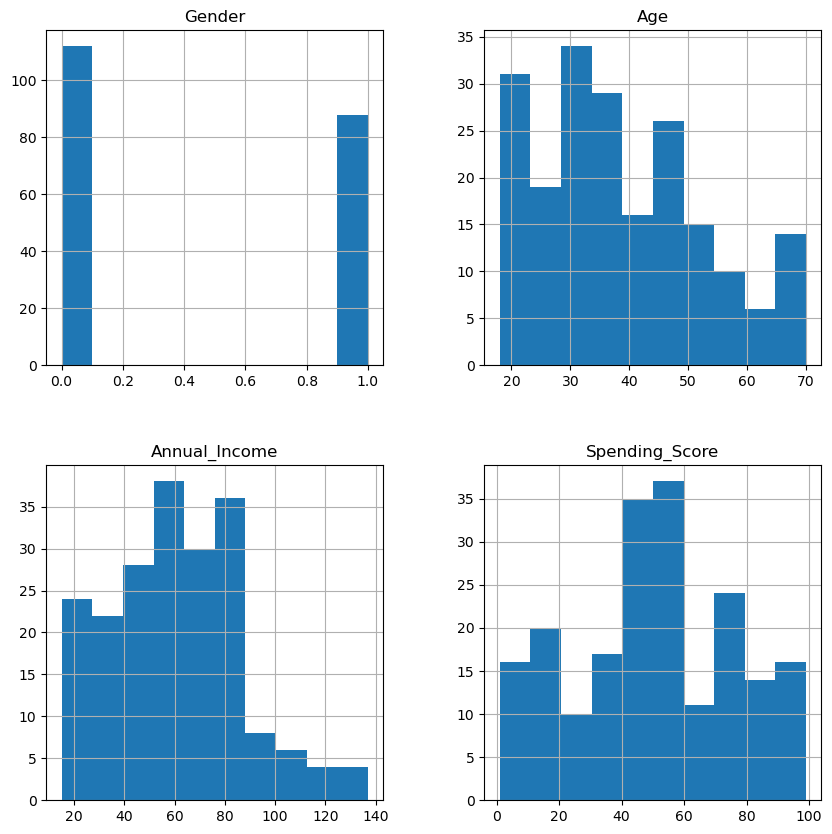

In [ ]:
data.hist(figsize=(10,10))

Gender               Axes(0.125,0.53;0.227941x0.35)
Age               Axes(0.398529,0.53;0.227941x0.35)
Annual_Income     Axes(0.672059,0.53;0.227941x0.35)
Spending_Score       Axes(0.125,0.11;0.227941x0.35)
dtype: object

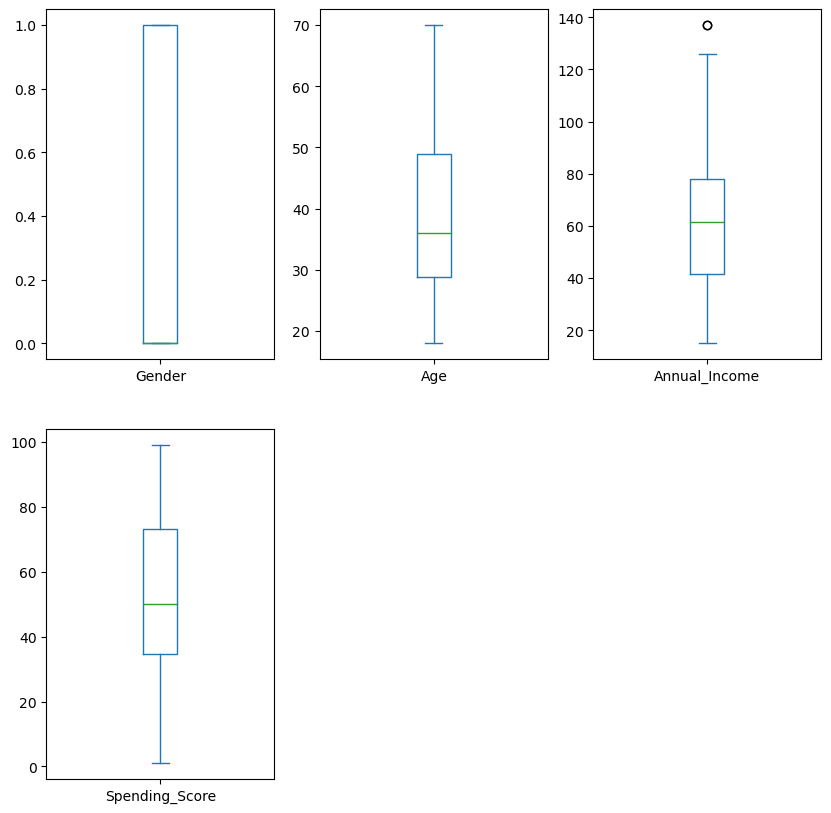

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,10))


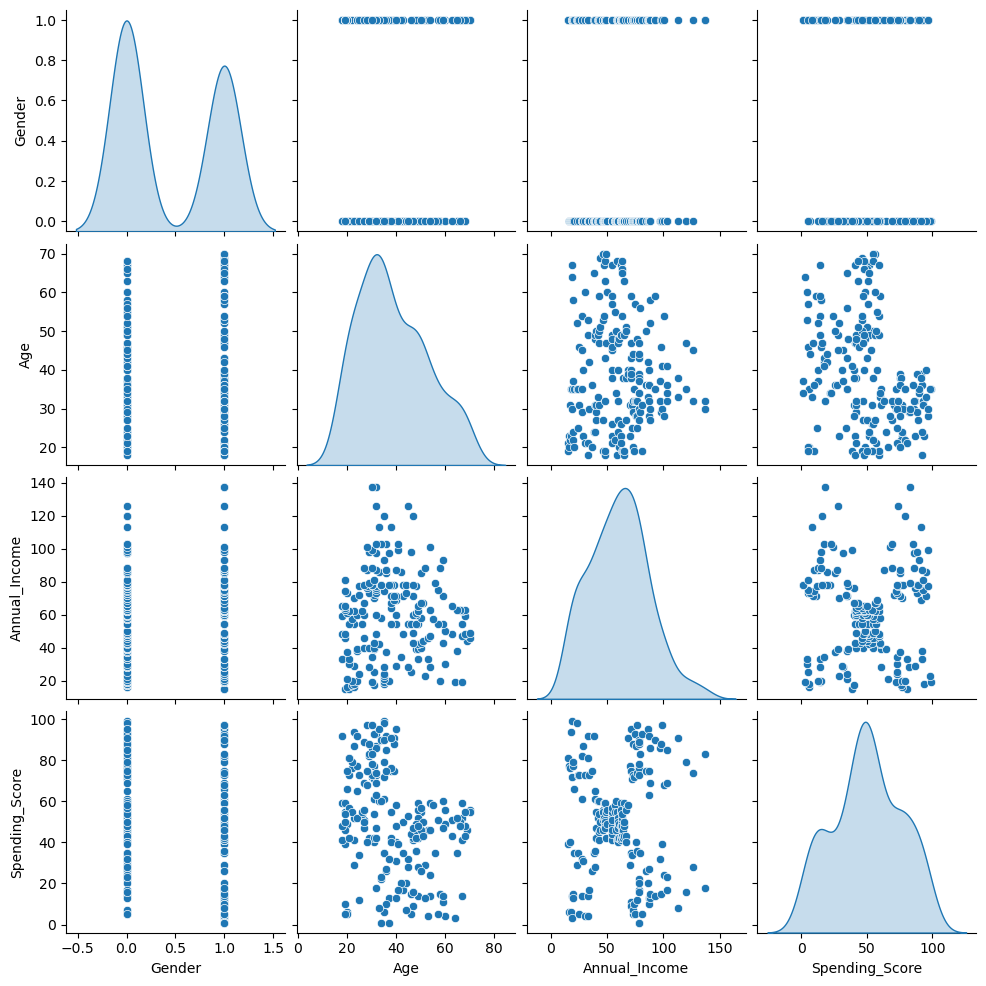

In [ ]:
sns.pairplot(data, diag_kind='kde')
plt.show()

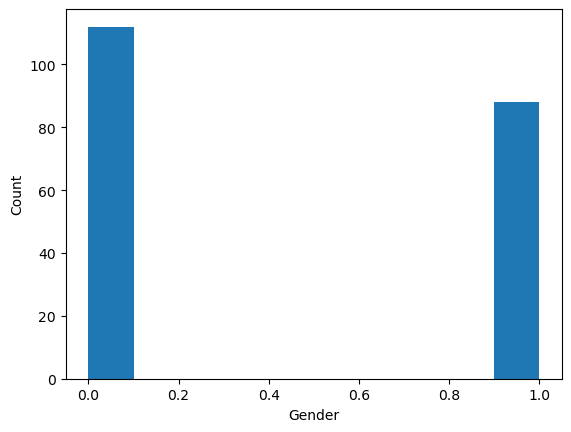

In [ ]:
data['Gender'].plot.hist()
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


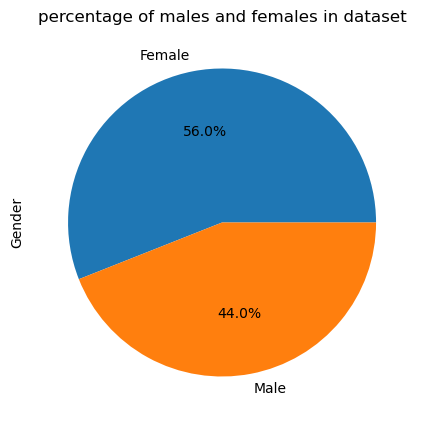

In [ ]:
tempdata['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("percentage of males and females in dataset")
plt.show()

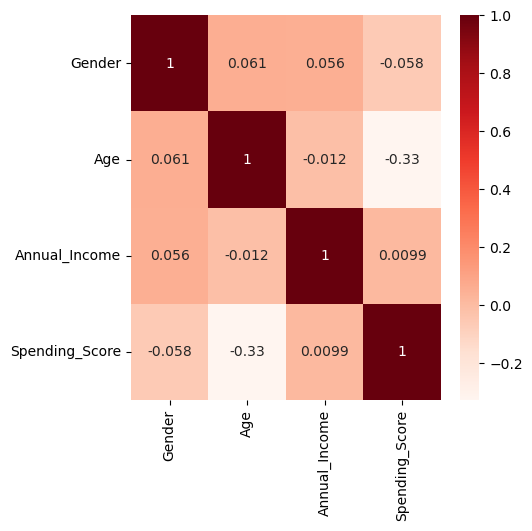

In [ ]:
#correlation matrix
correlation = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.show()

## K-Means Clustering

### Using the Elbow Method to find the optimal number of clusters

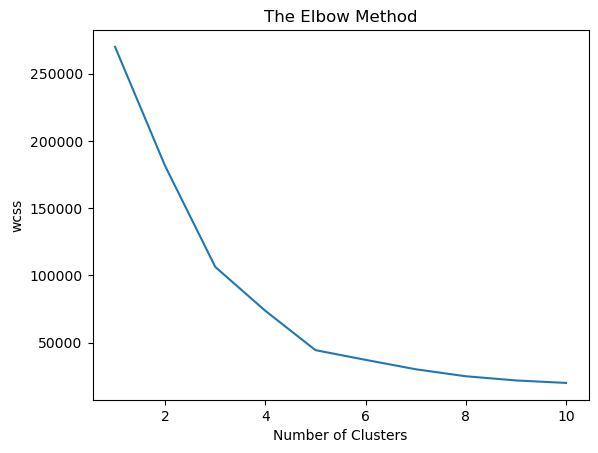

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

From above figure we can clearly see that the optimal number of clusters is "5"

### Training the K-means model on the Dataset

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualising the clusters

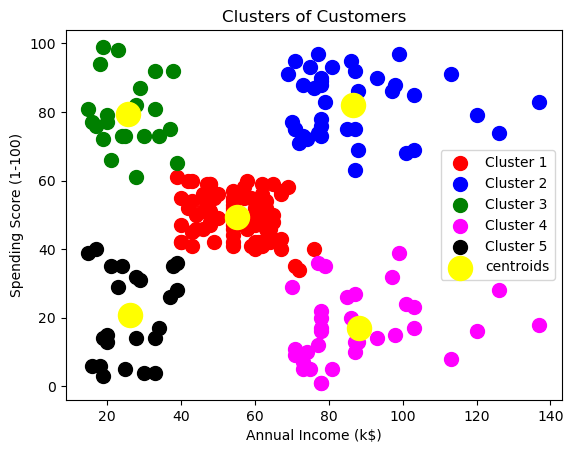

In [ ]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='magenta', label='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='black', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='centroids')
plt.legend()
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Conclusion :

We can clearly see from the above plot our customers clusterd into five groups which we can take these insight and target each customer with diffrent sales and ads that applies to his group and help increase income of the mall



1. cluster 1: is customers with medium income and medium spending score.
2. cluster 2: is customers with high income and high spending score
3. cluster 3 is customers with low income and high spending score.
4. cluster 4 is customers with high income and low spending score.
5. cluster 3 is customers with low income and low spending score.

